In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
#Melbourne dataset
df = pd.read_csv("Melbourne.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.shape

(34857, 21)

In [4]:
# rwos*columns
size = df.size
size

731997

In [5]:
#n-dimensions
data_ndim = df.ndim
data_ndim

2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.iloc[4:10,:2]

,Suburb,Address
4,Abbotsford,5 Charles St
5,Abbotsford,40 Federation La
6,Abbotsford,55a Park St
7,Abbotsford,16 Maugie St
8,Abbotsford,53 Turner St
9,Abbotsford,99 Turner St


In [8]:
df.loc[:3,"Address"]

0         68 Studley St
1          85 Turner St
2       25 Bloomburg St
3    18/659 Victoria St
Name: Address, dtype: object

# Preprocessing

In [9]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [10]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [11]:
temp1 = df #filling null values with mean
temp2 = df #filling null values with median
temp3 = df #for using label encoder

In [12]:
mean_price = temp1['Price'].mean()

In [13]:
temp1['Price'].isnull().sum()

7610

In [14]:
temp1['Price'] = temp1['Price'].fillna(mean_price)

In [15]:
temp1['Price'].isnull().sum()

0

In [16]:
temp1.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [17]:
median_Bedroom2 = temp2['Bedroom2'].median()

In [18]:
temp2['Bedroom2'].isnull().sum()

8217

In [19]:
temp2['Bedroom2'] = temp2['Bedroom2'].fillna(median_Bedroom2)
temp2['Bedroom2'].isnull().sum()

0

In [20]:
temp2['Bedroom2']

0        2.0
1        2.0
2        2.0
3        3.0
4        3.0
        ... 
34852    4.0
34853    2.0
34854    2.0
34855    3.0
34856    2.0
Name: Bedroom2, Length: 34857, dtype: float64

# Learning how to identify and remove duplicate values

In [21]:
df.duplicated(subset=None, keep=False).value_counts()

False    34855
True         2
dtype: int64

In [22]:
boolean_values = df.duplicated(subset=None, keep=False)
boolean_values

0        False
1        False
2        False
3        False
4        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Length: 34857, dtype: bool

# LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
s = LabelEncoder()

In [24]:
Suburbs_categorical = s.fit_transform(temp3['Suburb'])
print(Suburbs_categorical)

[  0   0   0 ... 348 348 348]


In [25]:
temp3['Suburb_new'] = Suburbs_categorical

In [26]:
temp3['Suburb_new'].unique()

array([  0,   2,   4,   6,   7,   9,  11,  12,  13,  14,  18,  21,  22,
        23,  31,  32,  41,  42,  44,  45,  49,  51,  53,  59,  62,  64,
        66,  67,  71,  73,  74,  75,  83,  85,  86,  88, 112, 117, 120,
       123, 127, 128, 132, 137, 138, 139, 140, 150, 152, 153, 157, 159,
       160, 162, 168, 169, 174, 177, 181, 184, 187, 188, 189, 196, 206,
       207, 208, 209, 212, 220, 224, 227, 228, 237, 238, 240, 242, 245,
       248, 254, 255, 260, 261, 262, 265, 266, 273, 282, 286, 288, 289,
       290, 295, 296, 299, 300, 301, 302, 309, 312, 313, 320, 328, 334,
       340, 341, 342, 346, 348,   1,  30,  50,  56,  63,  65, 118, 129,
       133, 163, 167, 178, 179, 193, 194, 234, 251, 333,   5,  48, 149,
       246, 271,  95, 111, 285, 297, 314,  72, 281, 186, 145, 263,   8,
        10,  17,  24,  25,  28,  33,  35,  37,  39,  43,  46,  55,  58,
        60,  61,  68,  78,  80,  81,  84,  90,  91,  96,  97,  98, 101,
       102, 108, 110, 113, 114, 115, 119, 121, 122, 124, 126, 13

In [27]:
temp3['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [28]:
temp3.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_new
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0


# Passing negation of bool_values so as to get the unique values

In [29]:
unique_values = df[~boolean_values]

In [30]:
unique_values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_new
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1.480000e+06,PI,Jas,24/02/2018,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,348
34853,Yarraville,29A Murray St,2,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,348
34854,Yarraville,147A Severn St,2,t,7.050000e+05,S,Jas,24/02/2018,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,348
34855,Yarraville,12/37 Stephen St,3,h,1.140000e+06,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,348


In [31]:
duplicated_values = df[boolean_values]
duplicated_values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_new
15857,Nunawading,1/7 Lilian St,3,t,1.050173e+06,SP,Jellis,17/06/2017,15.4,3131.0,...,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0,244
15858,Nunawading,1/7 Lilian St,3,t,1.050173e+06,SP,Jellis,17/06/2017,15.4,3131.0,...,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0,244


# From here different normalization Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
normal_df = pd.read_csv("Melbourne.csv")
normal_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [33]:
normal_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

# MinMaxScaler

In [75]:
scaler = MinMaxScaler() # initialise scaler
scaler.fit_transform(normal_df[['Distance']]) # normalisation

array([[0.05197505],
       [0.05197505],
       [0.05197505],
       ...,
       [0.13097713],
       [0.13097713],
       [0.13097713]])

In [56]:
#min max scalar ---> using sklearn
scaler.fit_transform(normal_df[['Distance']])

array([[0.05197505],
       [0.05197505],
       [0.05197505],
       ...,
       [0.13097713],
       [0.13097713],
       [0.13097713]])

In [55]:
#min max scalar ---> self implementation

min_before = normal_df[['Distance']].min()
max_before = normal_df[['Distance']].max()
min_after = 0
max_after = 1
list_minmax1 = []
list_minmax2 = []
for x in normal_df['Distance']:
    list_minmax2.append((x-min_before)/(max_before-min_before)*(max_after-min_after)+min_after)
list_minmax1.append(list_minmax2)
list_minmax2

[Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dtype: float64,
 Distance    0.051975
 dt

# Standard Scaler

In [35]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(normal_df[['Distance', 'Postcode']]) # normalisation

array([[-1.27930352, -0.45002574],
       [-1.27930352, -0.45002574],
       [-1.27930352, -0.45002574],
       ...,
       [-0.71955765, -0.94533707],
       [-0.71955765, -0.94533707],
       [-0.71955765, -0.94533707]])

In [58]:
#self implementation
standard_deviation_distance = df['Distance'].std()
mean_distance = df['Distance'].mean()
list1 = []
for x in normal_df['Distance']:
    list1.append((x-mean_distance)/standard_deviation_distance)
for x in range(0,10,1):
    print(list1[x])

-1.2792851676892552
-1.2792851676892552
-1.2792851676892552
-1.2792851676892552
-1.2792851676892552
-1.2792851676892552
-1.2792851676892552
-1.2792851676892552
-1.2792851676892552
-1.2792851676892552


# Using the normalize function

In [36]:
from sklearn import preprocessing
preprocessing.normalize([normal_df['Rooms']])

array([[0.00336611, 0.00336611, 0.00336611, ..., 0.00336611, 0.00504916,
        0.00336611]])

In [37]:
df.sample(n=10, random_state=1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_new
24881,Bentleigh East,76a Moylan St,4,t,1.500000e+06,VB,Gary,21/10/2017,13.8,3165.0,...,NaN,NaN,NaN,NaN,Glen Eira City Council,-37.90719,145.05460,Southern Metropolitan,10969.0,32
16635,Yarraville,224 Fogarty Av,4,h,1.435000e+06,SP,Nelson,24/06/2017,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,348
25337,Richmond,11/26 Rotherwood St,1,u,4.380000e+05,S,Jellis,21/10/2017,2.4,3121.0,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,14949.0,266
29131,Taylors Hill,4 Pyrmont Tce,4,h,7.200000e+05,S,YPA,25/11/2017,18.0,3037.0,...,2.0,NaN,175.0,2008.0,Melton City Council,-37.71390,144.74700,Western Metropolitan,4242.0,305
33803,Surrey Hills,24 Balmoral Cr,4,h,1.050173e+06,S,Kay,17/03/2018,10.2,3127.0,...,3.0,1588.0,323.0,1910.0,Boroondara City Council,-37.82531,145.10601,Southern Metropolitan,5457.0,302
32731,Mill Park,2/8 Orsett Ct,2,u,5.050000e+05,S,Barry,17/02/2018,17.9,3082.0,...,NaN,NaN,NaN,NaN,Whittlesea City Council,NaN,NaN,Northern Metropolitan,10529.0,221
9418,Southbank,2503/109 Clarendon St,2,u,3.800000e+05,PI,Greg,13/08/2016,1.2,3006.0,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Southern Metropolitan,8400.0,289
29705,Mill Park,17 Clement Ct,4,h,7.510000e+05,S,HAR,6/01/2018,17.9,3082.0,...,2.0,NaN,NaN,NaN,Whittlesea City Council,-37.65977,145.03857,Northern Metropolitan,10529.0,221
25533,Avondale Heights,23 Ridley Av,3,u,7.570000e+05,S,Moonee,28/10/2017,9.5,3034.0,...,1.0,NaN,NaN,NaN,Moonee Valley City Council,-37.76133,144.85882,Western Metropolitan,4502.0,18
29485,Fawkner,1 Link Pde,3,h,4.820000e+05,S,Brad,6/01/2018,13.1,3060.0,...,1.0,NaN,98.0,1960.0,Hume City Council,-37.70687,144.97027,Northern Metropolitan,5070.0,133


## Chi Square

In [82]:
temp = temp1
temp=df['Regionname'].dropna()

# null hypothesis: Probabilty that house in Melbourne is in ['Northern Metropolitan', 'Western Metropolitan',
#        'Southern Metropolitan', 'Eastern Metropolitan',
#        'South-Eastern Metropolitan', 'Eastern Victoria',
#        'Northern Victoria', 'Western Victoria'] is 1/8 .
# null hypothesis: Distribution between sample and population of Regions of Melbourne is same.
       
# alernate hypothesis: Distribution is not similar
#alernate hypothesis: Regions are not equally distributed
#for significance level 5%.

sample=temp.sample(34000,random_state=1)

data_count=temp.value_counts()
sample_count=sample.value_counts()

features=temp.unique()

chi=0
for i in features:
    chi=chi+(data_count.loc[i]-sample_count.loc[i])**2/data_count.loc[i]
chi    

21.02894638575105

In [84]:
degrees_freedom=len(features)-1
degrees_freedom

7

# Correlation Matrix : Heatmap

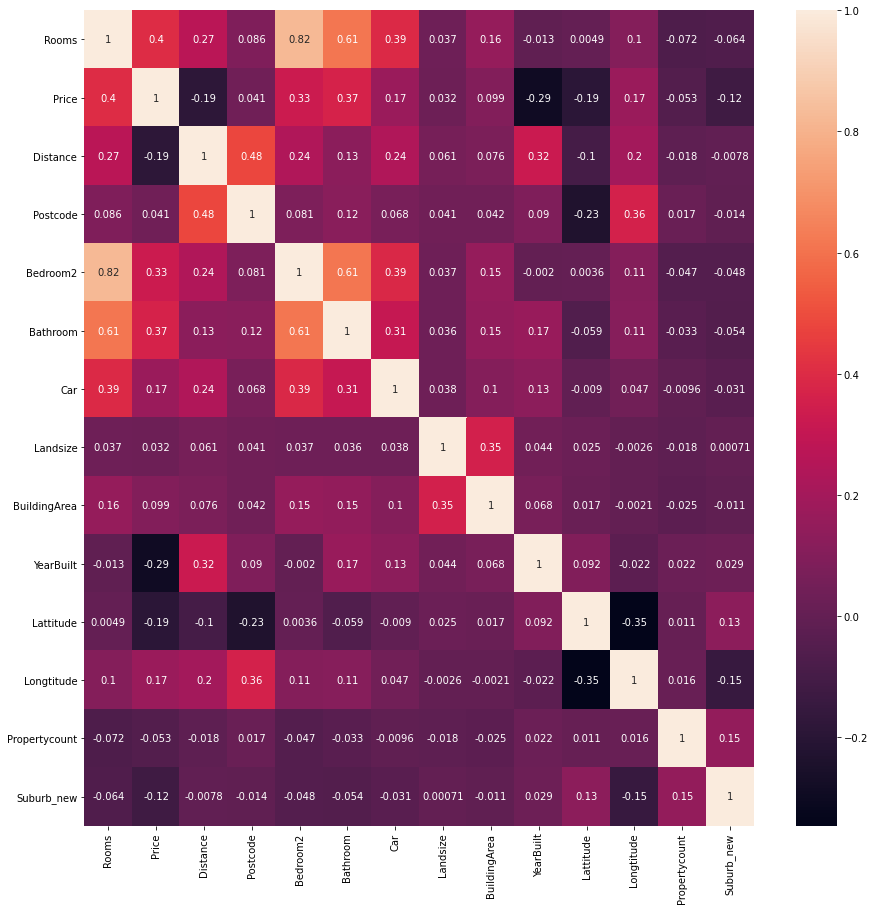

In [38]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Binning

In [39]:
#function for binning
def bfn(col, cut_pts, labels = None):
    min_value = col.min()
    max_value = col.max()
    break_pts = [min_value] + cut_pts + [max_value]
    if not labels:
        labels= range(len(cut_pts)+1)
    colbin = pd.cut(col, bins=break_pts, labels = labels, include_lowest=True)
    return colbin

In [40]:
cut_pts = [500000,5000000, 7000000]
labels = ['Low', 'Medium', 'High', 'Very High']
temp1['Level'] =  bfn(temp1['Price'], cut_pts, labels)
temp1['Level']

0        Medium
1        Medium
2        Medium
3        Medium
4        Medium
          ...  
34852    Medium
34853    Medium
34854    Medium
34855    Medium
34856    Medium
Name: Level, Length: 34857, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [41]:
temp1[temp1['Level'] == 'Very High']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_new,Level
12539,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,...,2079.0,464.3,1880.0,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265.0,64,Very High
15696,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,17/06/2017,5.3,3122.0,...,1690.0,284.0,1863.0,Boroondara City Council,-37.82652,145.03052,Southern Metropolitan,11308.0,162,Very High
19583,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,...,744.0,117.0,1960.0,Monash City Council,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,233,Very High
25635,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,28/10/2017,10.5,3186.0,...,1400.0,NaN,NaN,Bayside City Council,-37.89335,144.98643,Southern Metropolitan,10579.0,44,Very High


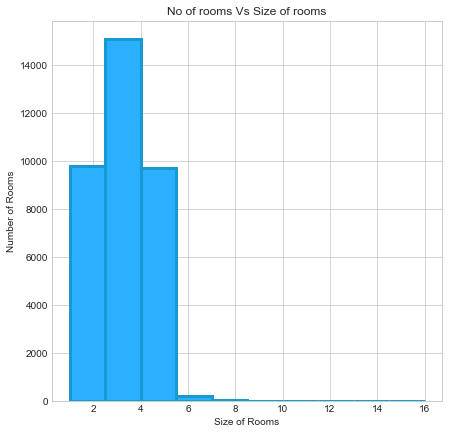

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7)) 
plt.style.use('seaborn-whitegrid') 
plt.hist(df['Rooms'], bins=10, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=3)
plt.title('No of rooms Vs Size of rooms') 
plt.xlabel('Size of Rooms') 
plt.ylabel('Number of Rooms') 
plt.show()